# zomato Data Analysis Project

## Step 1 -> imorting libraries

pandas is used for data maniulation and analysis.

numpy is used for numerical operations.

matlotlib.pyplot and seaborn are used for data visualization.
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\goyal\AppData\Local\Temp\ipykernel_28492\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## step2 -> Create the dataframe

In [7]:
dataframe = pd.read_csv("Zomato data.csv")
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

**Convert the Data type of rate from 4.1/5 to single rating like no denominator**

In [15]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

dataframe['rate'] = dataframe['rate'].apply(handleRate)
print(dataframe.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [17]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


**Q1 -> what type of restaurent do the majority of customers order from?**

# type of restaurent

In [19]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'type of restaurent')

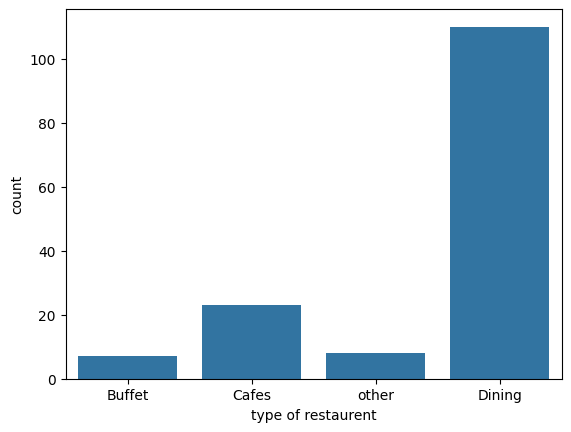

In [20]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("type of restaurent")

## conclusion - majority of the restaurent falls in dinning catogory

# Q2-> how many votes has each type of restaurent received from customers?#

In [26]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'votes')

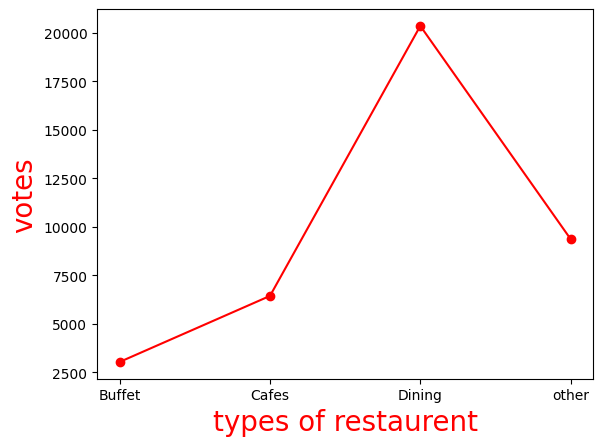

In [33]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes' : grouped_data})
plt.plot(result, c="red", marker="o")
plt.xlabel("types of restaurent", c="red", size=20)
plt.ylabel("votes", c = "red", size = 20)

**conclusion -  dining restaurents have received maximum votes**

# Q3-> what are the ratings that the majority of restaurents have received

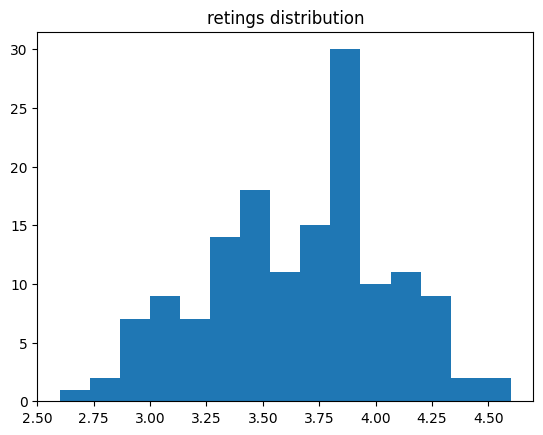

In [36]:
plt.hist(dataframe['rate'],bins=15)
plt.title("retings distribution")
plt.show()

**conclusion - majority restaurent rating from 3.5 to 4.0**

# Q4 -> Zomato has observed that most couples order most of their food online, what is their average spending on each order#

# Average order spending by couples #

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

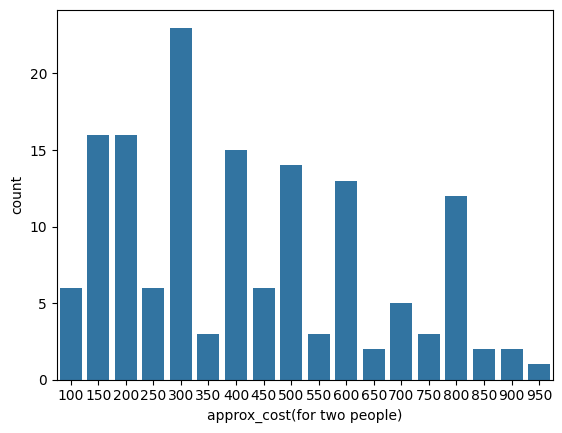

In [38]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)


**conclusion - the majority of couples prefers restaurent with an approximate cost of 300 rupees**

# Q5 -> which mode(online/offline) has received the maximum rating? #

**which mode received maximum rating**

<Axes: xlabel='online_order', ylabel='rate'>

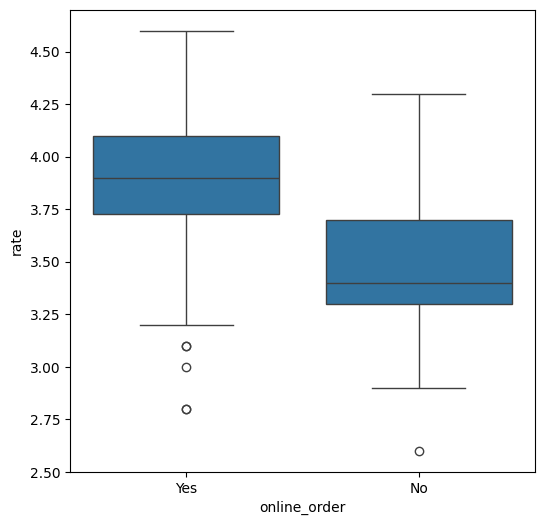

In [39]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)

**conclusion - offline order received lower rating in comparison to online order**

# Q6 -> which type of restaurent received more offline orders, so that zomato can provides customers with same good offers? 

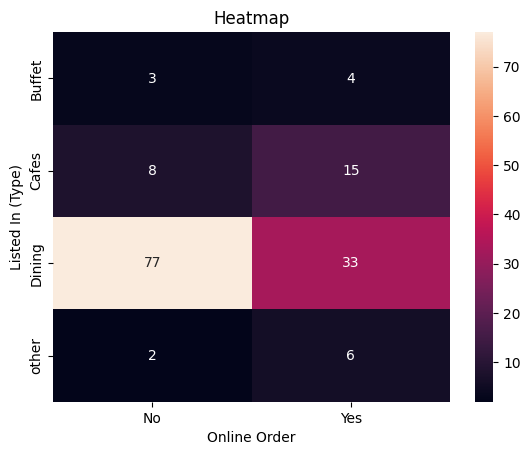

In [47]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

In [ ]:
** conclusion - dining restaurents primilarly accept offline order, whereas cafes primilarly received orders, this suggest that client prefers orders in prson at restaurents, but prefer oline 